# Background

The fold card allows the user to get sats back on purchases rather than a percentage of the purchase in fiat. Speciifcally, it is not a static percentage of the purchase the user gets back, but an opportunity to spin a random wheel for varying levels of sats back. The wheel, sats back, and percentages change on a regular basis. This is an analysis of Fold's 2021-22 holiday season wheel.

Fold states that the expected frequency of it's results are:

Spinbomb - 1% (spinbombs result in many extra spins that the user must use within minutes)

Deposits - 17.5% (the user gets 100% of their 30 day deposits in sats up to 1000 sats)

Purchases - 17.5% (the user gets 100% of their 30 day purchases in sats up to 1000 sats)

0.25% back - 16.99% (the user gets 0.25% of the purchase back in sats to a max of $20 in sats)

1% back - 17.5% (the user gets 1% of the purchase back in sats to a max of $20 in sats)

1.5% back - 17.5% (the user gets 1.5% of the purchase back in sats to a max of $20 in sats)

4% back - 5% (The user gets 4% of the purchase back in sats to a max of $20 in sats)

Once a user spins, they may accept their spin result or use earned additional spins to improve their sats back. 

# Method
105 consequtive spins were recorded. These include original spins and used extra spins that the user aquired via Fold's processes. Spin results that did not occur in the sample were ignored in this analysis. 

The initial sample was used to bootstrap larger random samples and the distribution of the resulting frequencies was compared to the published expected frequencies.

In [254]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's bring in Fold's published odds as our expected frequencies (Exp_Freq).

In [255]:
expected_df = pd.DataFrame({'Result':['Spinbomb','Dep','Purch','1000 sats','1%','1.5%','0.25%','4%'],
             'Freq':[.01,.175,.175,.07,.175,.175,.1699,.05]}).set_index('Result',drop=True)
expected_df['Type']='Exp_Freq'
expected_df.reset_index(inplace=True,drop=False)
expected_df

,Result,Freq,Type
0,Spinbomb,0.0100,Exp_Freq
1,Dep,0.1750,Exp_Freq
2,Purch,0.1750,Exp_Freq
3,1000 sats,0.0700,Exp_Freq
4,1%,0.1750,Exp_Freq
5,1.5%,0.1750,Exp_Freq
6,0.25%,0.1699,Exp_Freq
7,4%,0.0500,Exp_Freq


Now, we'll take a look at the 105 observed spins from the last two weeks of 2021.

In [256]:
obs_spins = ['Dep', '1%', 'Purch', '1000 sats', '1.5%', '1%', 'Dep', 'Purch',
       '1%', '1%', '1.5%', '4%', '1%', '1%', '0.25%', '1000 sats', '1.5%',
       '1%', '1.5%', 'Purch', '1.5%', 'Purch', 'Dep', '4%', '1%', 'Dep',
       'Dep', '1%', '0.25%', 'Purch', '0.25%', '0.25%', 'Spinbomb', '1%',
       '0.25%', '1%', 'Dep', '0.25%', '0.25%', 'Purch', '1000 sats',
       '1.5%', '1.5%', 'Purch', '0.25%', '1%', '0.25%', 'Purch', 'Purch',
       '0.25%', 'Dep', 'Purch', 'Dep', 'Dep', 'Purch', '1%', '0.25%',
       '4%', '1%', '1.5%', '1%', '1.5%', '1.5%', '1%', 'Purch', '1%',
       '1.5%', '1%', '1.5%', 'Dep', 'Purch', '0.25%', '1%', '4%', '1%',
       '0.25%', '1000 sats', '4%', 'Dep', '1000 sats', '1.5%', '1%', '1%',
       '1000 sats', '1.5%', '1.5%', '1000 sats', '1.5%', 'Dep', '0.25%',
       '0.25%', '1%', '1000 sats', '1.5%', '1%', '1%', '1.5%', '1.5%',
       'Dep', '0.25%', 'Dep', 'Dep', 'Purch', '0.25%', 'Purch']

In [257]:
#create dataframe of observed spins frequency
observed_df = pd.DataFrame(pd.DataFrame({'Result':obs_spins}).value_counts(normalize=True),columns=['Freq'])
observed_df['Type']='Obs_Freq'
observed_df.reset_index(inplace=True,drop=False)
observed_df

,Result,Freq,Type
0,1%,0.238095,Obs_Freq
1,1.5%,0.180952,Obs_Freq
2,0.25%,0.161905,Obs_Freq
3,Dep,0.142857,Obs_Freq
4,Purch,0.142857,Obs_Freq
5,1000 sats,0.076190,Obs_Freq
6,4%,0.047619,Obs_Freq
7,Spinbomb,0.009524,Obs_Freq


Now let's bring these together for an initial look.

In [258]:
df=observed_df.append(expected_df)

df

,Result,Freq,Type
0,1%,0.238095,Obs_Freq
1,1.5%,0.180952,Obs_Freq
2,0.25%,0.161905,Obs_Freq
3,Dep,0.142857,Obs_Freq
4,Purch,0.142857,Obs_Freq
5,1000 sats,0.076190,Obs_Freq
6,4%,0.047619,Obs_Freq
7,Spinbomb,0.009524,Obs_Freq
0,Spinbomb,0.010000,Exp_Freq
1,Dep,0.175000,Exp_Freq


And we can visualize this for an ituitive first look.

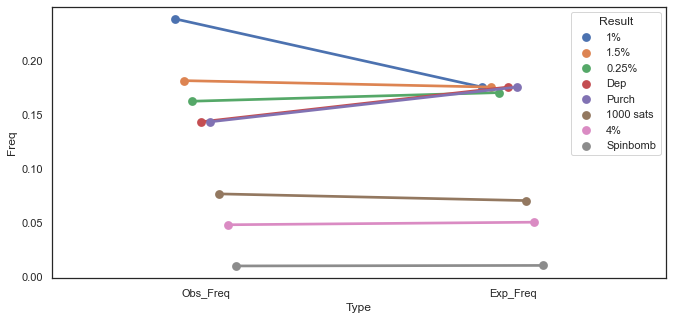

In [261]:
sns.set(rc={'figure.figsize':(11,5)})
sns.set_style('white')
sns.pointplot(x=df.Type, y=df.Freq,hue=df.Result,data=df,dodge=True);

So, just eyeballing the data it looks like several spin results are in line with the expected odds. Spinbomb, 1000 sats, 4% of purchase, 1.5% of purchase, and 0.25% of purchase all appear as nearly horizontal lines.

However, both 30-day purchases and deposits seem to occur at lower frequencies than expected, while 1% of purchase appears to occur at much higher frequency than expected.

But what we can't see from this pointplot is any statistical validity in this assessment. Normally, with only 105 observations of 8 outcomes, we wouldn't have the power to do any statistical validity. However, bootstrapping or resampling with replacement offers us a chance to create confidence intervals to compare observed results with. 

Our first step is to create a numpy array from our observed dataset.

In [240]:
spins = np.array(obs_spins)

Now we create empty lists to hold our 

In [242]:
#set all lists to empty
purch_freqs=[]
sats_freqs=[]
perc_quart_freqs=[]
spinbomb_freqs=[]
perc_15_freqs=[]
dep_freqs=[]
perc_4_freqs=[]
perc_1_freqs=[]
for i in range(10000):
    #create bootstrap sample
    boot = np.random.choice(spins,10000,replace=True)

    purch_freq = boot[boot=='Purch'].size/boot.size
    purch_freqs.append(purch_freq)

    sats_freq = boot[boot=='1000 sats'].size/boot.size
    sats_freqs.append(sats_freq)

    perc_quart_freq = boot[boot=='0.25%'].size/boot.size
    perc_quart_freqs.append(perc_quart_freq)

    spinbomb_freq = boot[boot=='Spinbomb'].size/boot.size
    spinbomb_freqs.append(spinbomb_freq)
    perc_15_freq = boot[boot=='1.5%'].size/boot.size
    perc_15_freqs.append(perc_15_freq)
    dep_freq = boot[boot=='Dep'].size/boot.size
    dep_freqs.append(dep_freq)
    perc_4_freq = boot[boot=='4%'].size/boot.size
    perc_4_freqs.append(perc_4_freq)
    perc_1_freq = boot[boot=='1%'].size/boot.size
    perc_1_freqs.append(perc_1_freq)


0.011

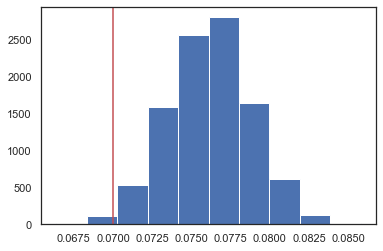

In [243]:
plt.figure(figsize=(6,4))
plt.hist(sats_freqs)
plt.axvline(fold_says.get('1000 sats'),color='r');
(np.array(sats_freqs) <= fold_says.get('1000 sats')).mean()

The 95% confidence interval for the bootstrapped mean does not include the expected frequency of 1000 sats. Winning 1000 sats occurs more than expected.

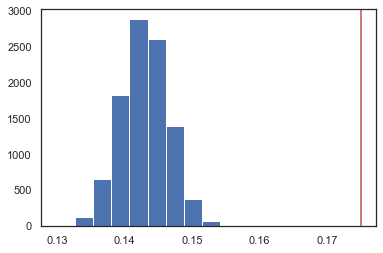

In [244]:
plt.figure(figsize=(6,4))
plt.hist(purch_freqs)
plt.axvline(fold_says.get('Purch'),color='r');

The 95% confidence interval for the bootstrapped mean does not include the expected frequency of winning the 30 days purchases in sats. Winning 30 days purchases in sats occurs less frequently than expected.

0.0164

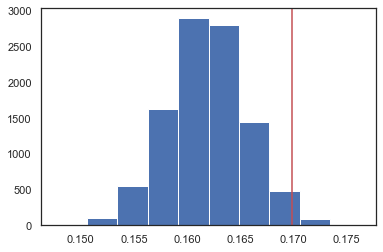

In [245]:
plt.figure(figsize=(6,4))
plt.hist(perc_quart_freqs)
plt.axvline(fold_says.get('0.25%'),color='r');
(np.array(perc_quart_freqs)>=fold_says.get('0.25%')).mean()

The 95% confidence interval of the mean of the bootstrapped samples does not contain the expected frequency of winning 0.25% of the purchase. It occurs less frequently.

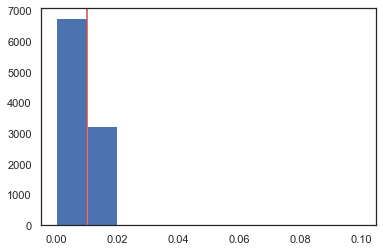

In [246]:
plt.figure(figsize=(6,4))
plt.hist(spinbomb_freqs,range=[0, .1])
plt.axvline(fold_says.get('Spinbomb'),color='r');

The published frequency occurs within the 95% confidence interval of the bootstrapped samples.

0.0621

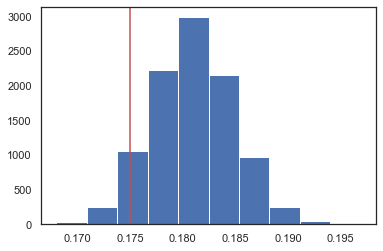

In [247]:
plt.figure(figsize=(6,4))
plt.hist(perc_15_freqs)
plt.axvline(fold_says.get('1.5%'),color='r');
(np.array(perc_15_freqs)<=fold_says.get('1.5%')).mean()

The published frequency of winning 1.5% of the purchase back in sats is within the 95% confidence interval of the bootstrapped samples.

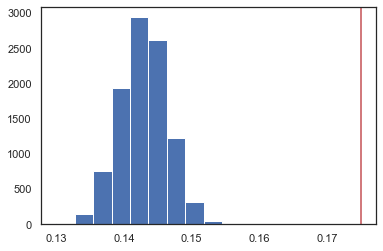

In [248]:
plt.figure(figsize=(6,4))
plt.hist(dep_freqs)
plt.axvline(fold_says.get('Dep'),color='r');

The published frequency of winning 30 days Deposits in sats is not within the 95% confidence interval of the bootstrapped samples. It occurs less frequently than published.

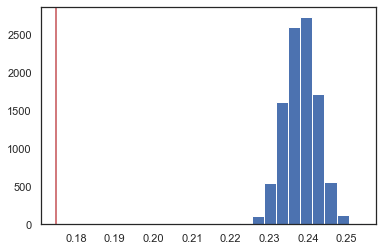

In [249]:
plt.figure(figsize=(6,4))
plt.hist(perc_1_freqs)
plt.axvline(fold_says.get('1%'),color='r');

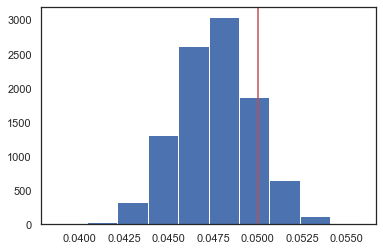

In [250]:
plt.figure(figsize=(6,4))
plt.hist(perc_4_freqs)
plt.axvline(fold_says.get('4%'),color='r');

The published frequency of winning 4% of the purchase back in sats is within the 95% confidence intervals of the bootstrapped samples. 